##  Import Libraries and Configure Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set aesthetic style and default sizes for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

print("Libraries imported and plot settings configured.")

Libraries imported and plot settings configured.


## Load the Dataset

In [2]:
try:
    df = pd.read_csv('../data/togo-dapaong_qc.csv')
    print("Benin data loaded successfully!")
    print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'Benin-data.csv' not found. Please ensure the file is in the 'data/' directory.")
    df = pd.DataFrame()

Benin data loaded successfully!
Dataset contains 525600 rows and 19 columns.


In [3]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
df.tail(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


## Profile Initial Data Types
#Before making any changes, we inspect the data types pandas has inferred for each # column upon loading. This is our baseline.

In [5]:
if not df.empty:
    print("--- Initial Data Types of Raw Data ---")
    print(df.dtypes)

--- Initial Data Types of Raw Data ---
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [6]:
if not df.empty:
    print("\n--- Initial Summary Statistics (including non-numeric columns) ---")
    print(df.describe(include='all'))


--- Initial Summary Statistics (including non-numeric columns) ---
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-25 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     230.555040     151.258469     116.444352   
std                  NaN     322.532347     250.956962     156.520714   
min                  NaN     -12.700000       0.000000       0.000000   
25%                  NaN      -2.200000       0.000000       0.000000   
50%                  NaN       2.100000       0.000000       2.500000   
75%                  NaN     442.400000     246.400000     215.700000   
max                  NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb    

In [7]:
if not df.empty:
    print("\n--- Initial Missing Value Report ---")
    missing_values = df.isna().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
    
    print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))


--- Initial Missing Value Report ---
          Missing Count  Missing Percentage
Comments         525600               100.0


In [8]:
if not df.empty:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    print("'Timestamp' column successfully converted to datetime format.")

'Timestamp' column successfully converted to datetime format.


In [9]:
if not df.empty:
    numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
                    'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
    
    print("\nConverting data columns to numeric type...")
    for col in numeric_cols:
        if col in df.columns and not pd.api.types.is_numeric_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"  - Column '{col}' converted to numeric.")


Converting data columns to numeric type...


In [10]:
if not df.empty and 'Cleaning' in df.columns:
    df['Cleaning'] = df['Cleaning'].astype('category')
    print("'Cleaning' column converted to category format.")

'Cleaning' column converted to category format.


In [11]:
if not df.empty:
    print("\nDetecting Outliers using Z-scores (|Z| > 3):")
    outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    
    for col in outlier_cols:
        if col in df.columns and df[col].std() != 0:
            df[f'Zscore_{col}'] = (df[col] - df[col].mean()) / df[col].std()
            outlier_count = (abs(df[f'Zscore_{col}']) > 3).sum()
            if outlier_count > 0:
                print(f"  - Found {outlier_count} outliers in '{col}'.")


Detecting Outliers using Z-scores (|Z| > 3):
  - Found 305 outliers in 'GHI'.
  - Found 1062 outliers in 'DNI'.
  - Found 3415 outliers in 'DHI'.
  - Found 137 outliers in 'ModA'.
  - Found 206 outliers in 'ModB'.
  - Found 3510 outliers in 'WS'.
  - Found 3915 outliers in 'WSgust'.


In [12]:
if not df.empty:
    initial_rows = len(df)
    critical_outlier_cols = ['GHI', 'DNI', 'DHI']
    
    for col in critical_outlier_cols:
        if f'Zscore_{col}' in df.columns:
            df = df[(abs(df[f'Zscore_{col}']) <= 3) | (df[f'Zscore_{col}'].isna())]
            
    print(f"Removed {initial_rows - len(df)} rows containing critical outliers.")

Removed 4714 rows containing critical outliers.


In [13]:
if not df.empty:
    print("\nImputing all remaining missing values...")
    for col in df.columns:
        if df[col].isna().sum() > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"  - Numeric column '{col}': Imputed with median ({median_val:.2f}).")
            else:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"  - Non-numeric column '{col}': Imputed with mode ('{mode_val}').")


Imputing all remaining missing values...
  - Numeric column 'Comments': Imputed with median (nan).


In [14]:
if not df.empty:
    zscore_cols_to_drop = [col for col in df.columns if 'Zscore_' in col]
    df.drop(columns=zscore_cols_to_drop, inplace=True)
    print("Temporary Z-score columns removed.")
    
    if 'Comments' in df.columns:
        df.drop(columns=['Comments'], inplace=True)
        print("'Comments' column dropped.")

Temporary Z-score columns removed.
'Comments' column dropped.


In [15]:
if not df.empty:
    print("\n--- Final Verification of Data Cleanliness ---")
    total_missing = df.isna().sum().sum()
    
    if total_missing == 0:
        print("Success! No missing values remain in the dataset.")
        print("\nFinal DataFrame Info:")
        df.info()
    else:
        print("Warning! Missing values still exist:")
        print(df.isna().sum()[df.isna().sum() > 0])


--- Final Verification of Data Cleanliness ---
Success! No missing values remain in the dataset.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 520886 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      520886 non-null  datetime64[ns]
 1   GHI            520886 non-null  float64       
 2   DNI            520886 non-null  float64       
 3   DHI            520886 non-null  float64       
 4   ModA           520886 non-null  float64       
 5   ModB           520886 non-null  float64       
 6   Tamb           520886 non-null  float64       
 7   RH             520886 non-null  float64       
 8   WS             520886 non-null  float64       
 9   WSgust         520886 non-null  float64       
 10  WSstdev        520886 non-null  float64       
 11  WD             520886 non-null  float64       
 12  WDstdev        520886 non-null  float64 

In [16]:
if not df.empty:
    output_path = '../data/togo_eda_clean.csv'
    df.to_csv(output_path, index=False)
    print(f"\nCleaned DataFrame exported successfully to '{output_path}'")


Cleaned DataFrame exported successfully to '../data/togo_eda_clean.csv'


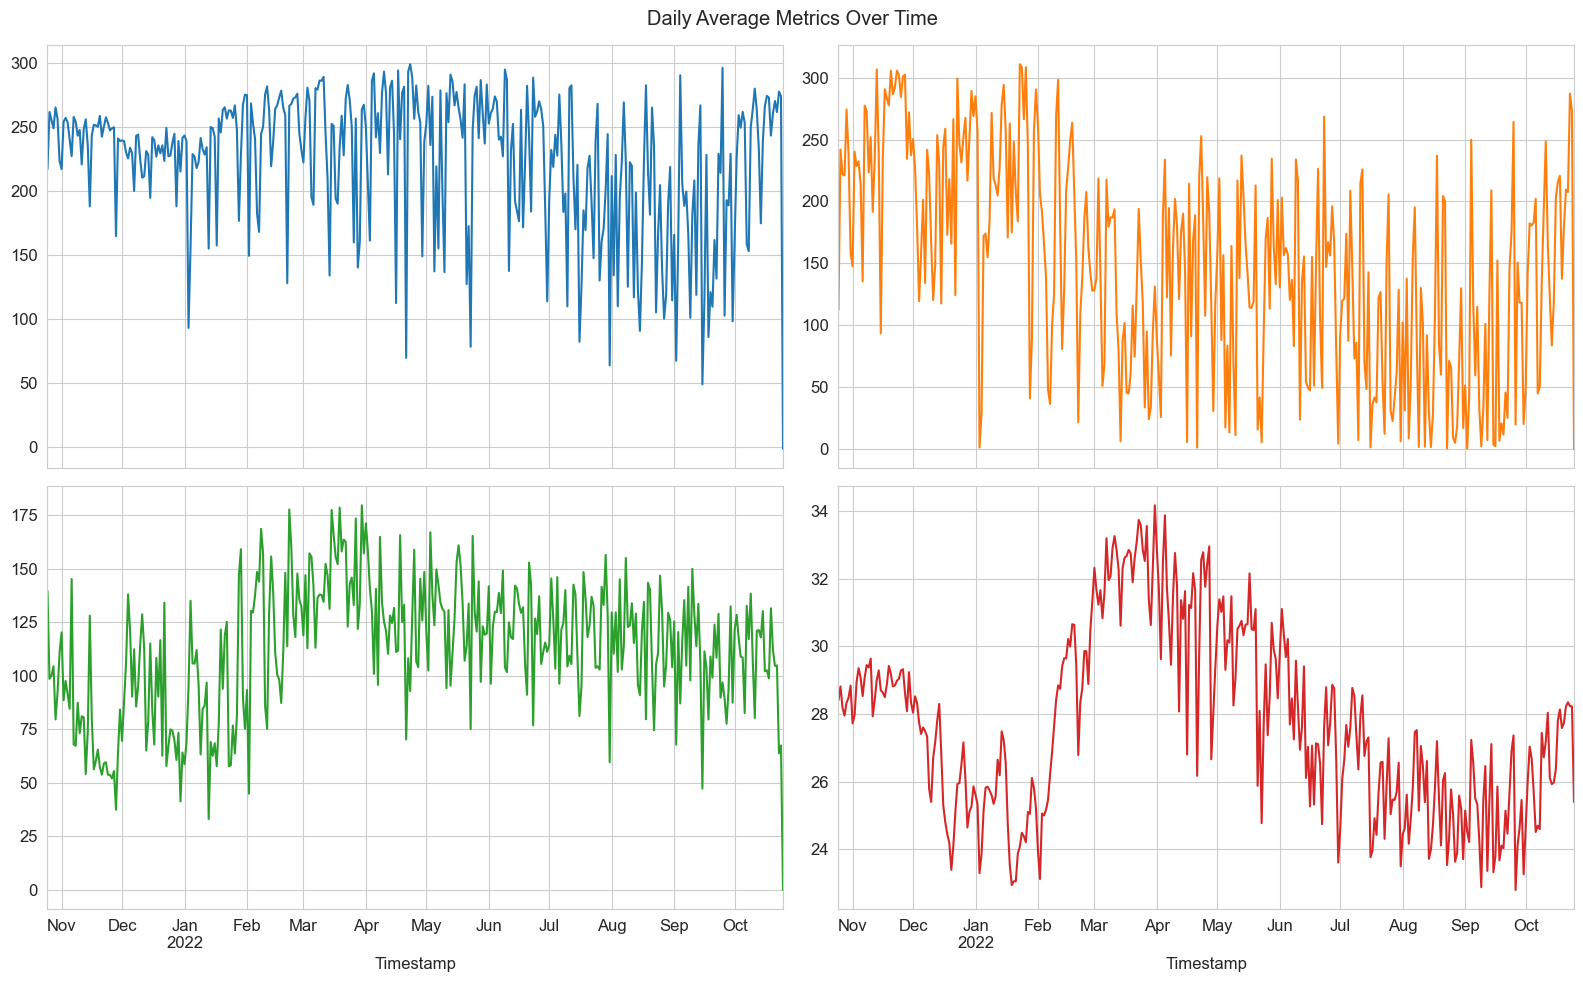

In [17]:
if not df.empty:
    df_ts = df.set_index('Timestamp')
    df_daily = df_ts.resample('D').mean(numeric_only=True)

    df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(
        subplots=True, 
        layout=(2, 2), 
        figsize=(16, 10),
        title='Daily Average Metrics Over Time',
        legend=False
    )
    plt.tight_layout()
    plt.show()

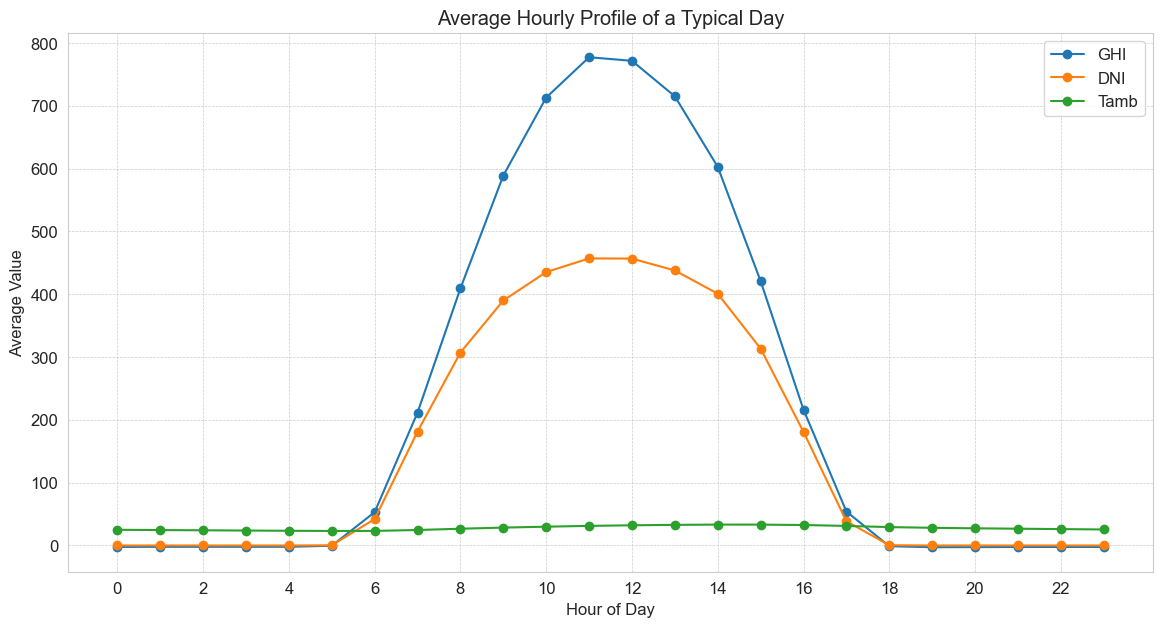

In [18]:
if not df.empty:
    df_hourly_avg = df.set_index('Timestamp').groupby(lambda x: x.hour).mean(numeric_only=True)
    
    df_hourly_avg[['GHI', 'DNI', 'Tamb']].plot(
        figsize=(14, 7), 
        marker='o',
        title='Average Hourly Profile of a Typical Day'
    )
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Value')
    plt.xticks(range(0, 24, 2))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

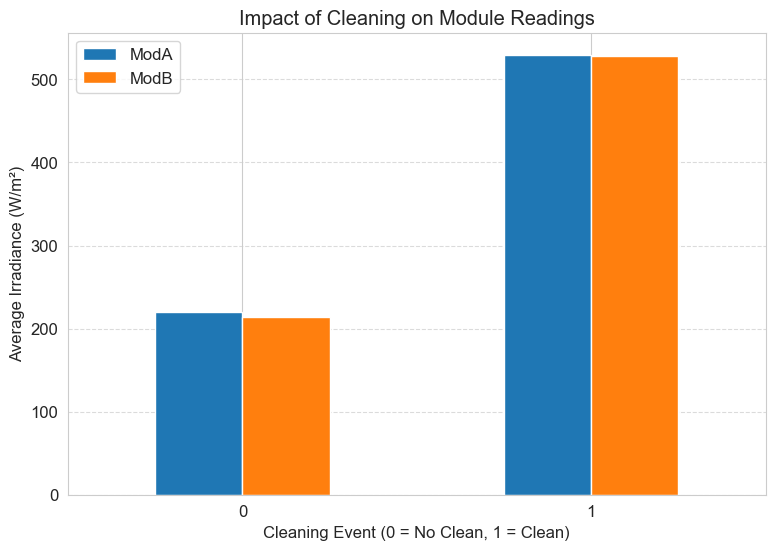

In [19]:
if not df.empty and 'Cleaning' in df.columns:
    cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean(numeric_only=True)
    
    cleaning_impact.plot(kind='bar', figsize=(9, 6))
    plt.title('Impact of Cleaning on Module Readings')
    plt.ylabel('Average Irradiance (W/m²)')
    plt.xlabel('Cleaning Event (0 = No Clean, 1 = Clean)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

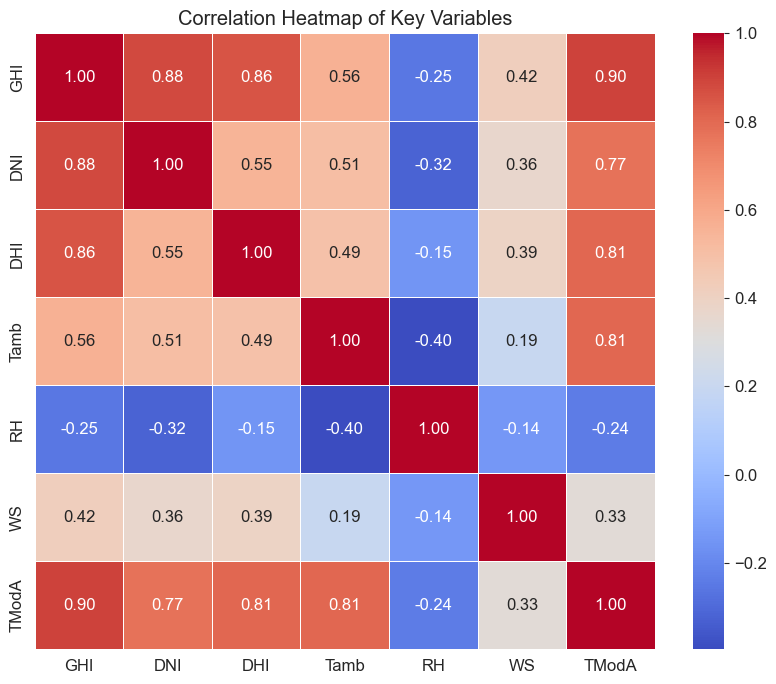

In [20]:
if not df.empty:
    correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'TModA']
    correlation_matrix = df[correlation_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Key Variables')
    plt.show()

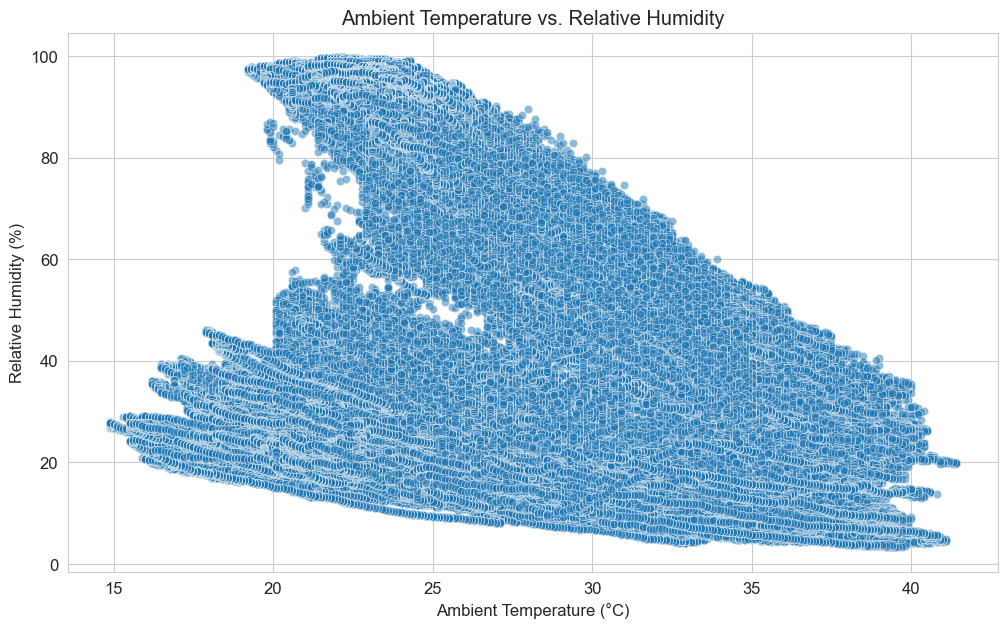

In [21]:
if not df.empty:
    sns.scatterplot(data=df, x='Tamb', y='RH', alpha=0.5)
    plt.title('Ambient Temperature vs. Relative Humidity')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('Relative Humidity (%)')
    plt.show()

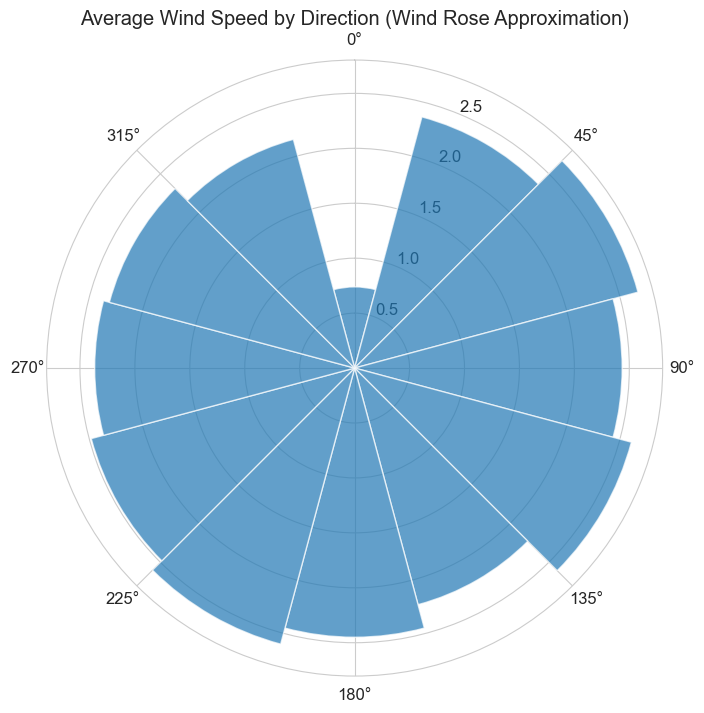

In [22]:
if not df.empty:
    bins = np.arange(0, 361, 30)
    df['WD_Bin'] = pd.cut(df['WD'], bins=bins, right=False, labels=np.arange(0, 360, 30))
    avg_ws_by_wd = df.groupby('WD_Bin')['WS'].mean().fillna(0)

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, projection='polar')
    ax.bar(np.radians(avg_ws_by_wd.index.astype(float)), avg_ws_by_wd.values, width=np.radians(30), alpha=0.7)
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title('Average Wind Speed by Direction (Wind Rose Approximation)')
    plt.show()

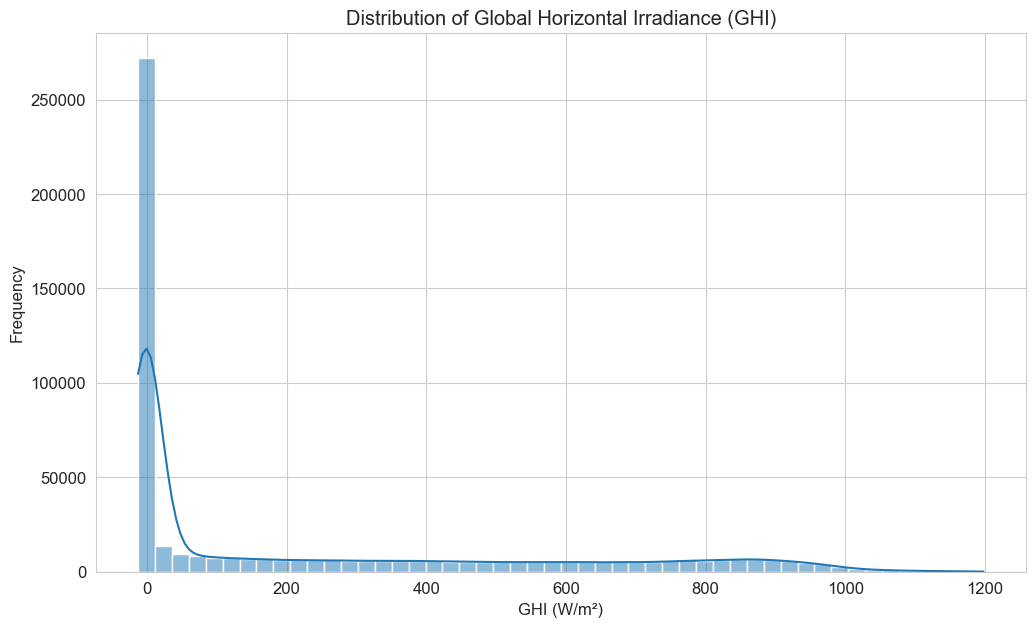

In [23]:
if not df.empty:
    sns.histplot(data=df, x='GHI', kde=True, bins=50)
    plt.title('Distribution of Global Horizontal Irradiance (GHI)')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel('Frequency')
    plt.show()

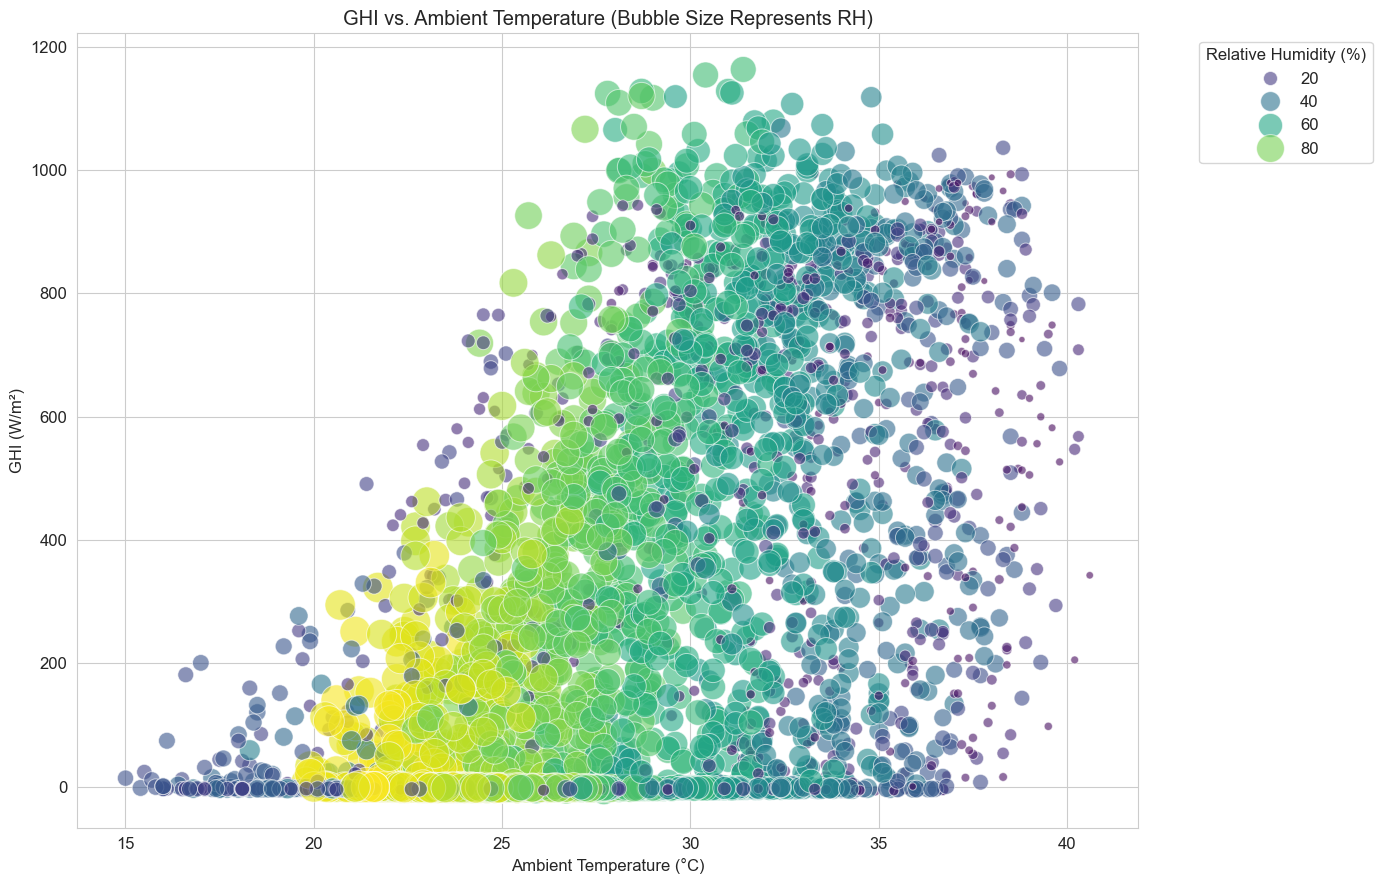

In [24]:
if not df.empty:
    sample_df = df.sample(n=min(5000, len(df)), random_state=42)
    
    plt.figure(figsize=(14, 9))
    sns.scatterplot(
        data=sample_df,
        x='Tamb',
        y='GHI',
        size='RH',
        hue='RH',
        sizes=(20, 500),
        alpha=0.6,
        palette='viridis'
    )
    plt.title('GHI vs. Ambient Temperature (Bubble Size Represents RH)')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('GHI (W/m²)')
    plt.legend(title='Relative Humidity (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()